In [63]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from numpy import pi
from pathlib import Path
from floquet_simulations.hamiltonians import GetEvalsAndEvecsGen
from scipy.special import jv, jn_zeros
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

figsize_hams=(4.3,4.3)
fontsize = 10
PlotParams(fontsize=fontsize, serif_font="cm")
colourbar_bbox = (0.9, 0.6, 1, 0.68)
cm_unit = 1/2.54
save_dir = Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"
cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', "#FFFFFF", '#F78320'], N=256)
ylabel_coords = (-0.12,0.5)
xlabel_coords = (0.5,-0.06)
num_sites = 11

axes_tick_pos=[0,2,4,6,8, 10]
axes_tick_labels=[rf"${i}$" for i in axes_tick_pos+np.array([1])] 


In [43]:
jn_zeros(0,1)

array([2.40482556])

60.12063894239432 138.00195275715777
0.3917377 -1.0


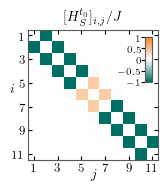

In [65]:
#SSS
centres = np.array([5])
funcs = [Cosine]
a_val = 90
omega0 = 25; T = 2*pi/omega0
print(jn_zeros(0,1)[0]*omega0, jn_zeros(0,2)[1]*omega0)

phi0 = 0
onsite0 =0

params = [[a_val, omega0, phi0, onsite0]]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,1); colourbar_ticks = np.arange(-1,1.1,0.5)
norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

title= r'$[H_S^{t_0}]_{i,j}/J$'

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))


pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)
ax.set_title(title)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=colourbar_bbox,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap),format=mticker.FixedFormatter(["$-1$","$-0.5$", "$0$", "$0.5$","$1$" ]), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=7, pad=0)

fig.savefig(save_dir/"sss_v2.pdf", format="pdf",    bbox_inches="tight", pad_inches=0)


plt.show()

0.3917377 -1.0


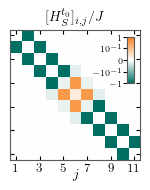

In [69]:
centres = np.array([5])
funcs = [Cosine]
a_val = 90
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0
params = [[a_val, omega0, phi0, onsite0]]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)

colourbar_bbox_log = (0.9, 0.59, 1, 0.7)

data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,1); colourbar_ticks = [-1,-0.1, 0, 0.1,1]

linthresh = 1e-1
norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=-1.0, vmax=1.0, base=10)

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))
pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


# ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(["", "", "", "", "", ""])

ax.set_xlabel("$j$", fontsize=fontsize)
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)
ax.set_title(title)

new_norm=mpl.colors.SymLogNorm(linthresh=linthresh, linscale=1, vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1], base=10)
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=colourbar_bbox_log,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins,  format=mticker.FixedFormatter(["$-1$","$-10^{-1}$", "$0$", "$10^{-1}$","$1$" ]), ticks=colourbar_ticks, ticklocation="left")
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins,  format=mticker.FixedFormatter(["$-1$","$-0.1$","$-0.01$", "$0$","$0.01$", "$0.1$","$1$" ]), ticks=colourbar_ticks, ticklocation="left")

cbar.ax.tick_params(labelsize=fontsize*0.6, pad=0)

fig.savefig(save_dir/"sss_log_v2.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()




0.2865181 -0.9986129


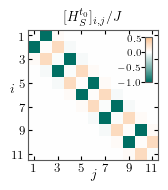

In [133]:
#SSH v2
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 39; a2 = 38; a3=-a1; a4=-a2
omega0 = 25; T = 2*pi/omega0
phi1 = 0; phi2 = 0; phi3 = 0; phi4 = 0
onsite1 =0; onsite2 = 0;  onsite3=0;onsite4 = 0
# params = [onsite0, [a1, omega1, phi1, onsite1], [(a2, a3), (omega2, omega3), (phi2, phi3), onsite2], [a4, omega4, phi4, onsite4]]*2
params = ([ [a1, omega0, phi1, onsite1], [a2, omega0, phi2, onsite2], [a3, omega0, phi3, onsite3], [a4, omega0, phi4, onsite4]]*3)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)



colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))

print(colourbar_max, colourbar_min)

title= r'$[H_S^{t_0}]_{i,j}/J$'

data_cmap_lims = (-1 ,1); colourbar_cmap_lims=(-1,0.5); colourbar_ticks = np.arange(-1,1.5,0.5)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))


pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_title(title)
new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=colourbar_bbox,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=7, pad=0)

fig.savefig(save_dir/"ssh_model_v2.pdf", format="pdf", bbox_inches="tight", pad_inches=0)


plt.show()

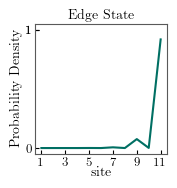

In [122]:
figsize_evec = figsize_hams
evals, evecs = GetEvalsAndEvecsGen(HF)
fig, ax = plt.subplots(figsize=(figsize_evec[0]*cm_unit, figsize_evec[1]*cm_unit))
ax.plot(np.linspace(1,num_sites,num_sites), evecs[:,5]**2, 
            linestyle = "-",
                # linestyle=(1,(3,1,1,1,1)), 
                c='#006F63')

ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel(r"Probability Density", rotation = 90)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.set_title("Edge State", y=0.97)

ax.set_xlabel(r"site")
ax.xaxis.set_label_coords(0.5,-0.09)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks([1,3,5,7,9,11])
ax.set_yticks([0,1,1])
fig.savefig(save_dir/"zero_energy_edge_state_v2.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()


0.3982707 -0.3943039


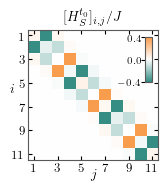

In [157]:
#SSH3 v2
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = -40; a2 = 2.5; a3=-52; a4=-a1; a5=-a2; a6=-a3
omega0 = 25; T = 2*pi/omega0
phi0 = 0
onsite0 =0
params = ([[a_val, omega0, phi0, onsite0] for a_val in [a1, a2, a3, a4, a5, a6]]*3)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
 
colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))

print(colourbar_max, colourbar_min)

label= r'$[H_S^{t_0}]_{i,j}/J$'

data_cmap_lims = (-0.5 ,0.5); colourbar_cmap_lims=(-0.4,0.4); colourbar_ticks = np.arange(-0.4,0.5,0.4)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  

ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)

ax.set_title(title)
new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=colourbar_bbox,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=7, pad=0)



fig.savefig(save_dir/"ssh3_model_v2.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()



0.3842303 -0.7230333


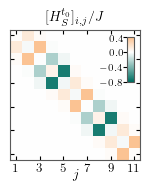

In [139]:
#SSH4
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 16.917322691940058; a2 = -50; a3 = 38.315948852085626; a4 = -10
omega0 = 25; T = 2*pi/omega0
phi1 = 0; phi2 = 0; phi3 = 0; phi4 = 0
# onsite1 =0.0697854749060796; onsite2 = 0.068;  onsite3=0;onsite4 = -0.068
onsite1 = onsite2 = onsite3 = onsite4 = 0
# params = [onsite0, [a1, omega1, phi1, onsite1], [(a2, a3), (omega2, omega3), (phi2, phi3), onsite2], [a4, omega4, phi4, onsite4]]*2
params = ([ [a1, omega0, phi1, onsite1], [a2, omega0, phi2, onsite2], [a3, omega0, phi3, onsite3], [a4, omega0, phi4, onsite4]]*3)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))
print(colourbar_max, colourbar_min)
label= r'$[H_S^{t_0}]_{i,j}/J$'
data_cmap_lims = (-0.8, 0.8); colourbar_cmap_lims=(-0.8,0.4); colourbar_ticks = np.arange(-0.8,1.2,0.4)

norm = mpl.colors.Normalize(vmin=data_cmap_lims[0], vmax=data_cmap_lims[1])

fig, ax = plt.subplots(figsize=(figsize_hams[0]*cm_unit, figsize_hams[1]*cm_unit))

pcm = ax.matshow(np.real(HF), interpolation='none', cmap=cmap,  norm=norm)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


# ax.set_ylabel('$i$', rotation=0)
ax.yaxis.set_label_coords(ylabel_coords[0], ylabel_coords[1])
ax.set_yticks(axes_tick_pos)
ax.set_yticklabels(["", "", "", "", "", ""])#, font="stix", fontsize=fontsize*0.9)

ax.set_xlabel("$j$")
ax.xaxis.set_label_coords(xlabel_coords[0], xlabel_coords[1])
ax.set_xticks(axes_tick_pos)
ax.set_xticklabels(axes_tick_labels)#, font="stix", fontsize=fontsize*0.9)
ax.set_title(title)

new_norm = mpl.colors.Normalize(vmin=colourbar_cmap_lims[0], vmax=colourbar_cmap_lims[1])
new_cmap = truncate_colormap(cmap, (colourbar_cmap_lims[0]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]), (colourbar_cmap_lims[1]-data_cmap_lims[0])/(data_cmap_lims[1] - data_cmap_lims[0]))
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="lower left",
    bbox_to_anchor=colourbar_bbox,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=new_norm, cmap=new_cmap), cax=axins, ticks=colourbar_ticks, ticklocation="left")
cbar.ax.tick_params(labelsize=7, pad=0)

fig.savefig(save_dir/"ssh4_model_v2.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

0.3982707 -0.3943039


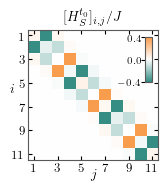

In [159]:
#bessel
num_sites = 5
centres = [2]
funcs = [Cosine]
omega0 = 10
num_As = 50
As = np.linspace(0,100,num_As)
phi0 = 0
onsite0 =0


In [ ]:
hoppings = np.empty(num_As, dtype=np.complex128)
for i, a0 in enumerate(As):
    T = 2*pi/omega0
    params = [[a0, omega0, phi0, onsite0]]
    _, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)
    hoppings[i] = HF[2,3]

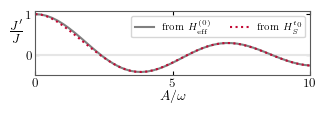

In [162]:
figsize_bessel = (9,2.1)
fig, ax = plt.subplots(figsize=(figsize_bessel[0]*cm_unit, figsize_bessel[1]*cm_unit))
ax.hlines(0,-0.5,11, color="0.9")

ax.plot(As/omega0, jv(0, As/omega0), color='0.5', label=r"from $H_\mathrm{eff}^{(0)}$")
ax.plot(As/omega0,  -np.real(hoppings),':', color="#C30934", label=r"from $H_S^{t_0}$")


ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=True, right=True, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xlabel(r"$A/\omega$")
ax.set_ylabel(r"$\frac{J'}{J}$", fontsize=fontsize*1.3, rotation=0)#
ax.yaxis.set_label_coords(-0.07,0.5)
ax.xaxis.set_label_coords(0.5,-0.24)
ax.set_xlim([0,10])
xticks = [0, 5, 10]
ax.set_xticks(xticks)
ax.set_xticklabels([rf"${i}$" for i in xticks])
ax.set_yticks([0,1])
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2 )
fig.savefig(save_dir/"bessel_func_strob_v2.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()
